In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
hotels = pd.read_table('hotels.txt', index_col=0)
users = pd.read_table('users.txt', index_col=0)
activity = pd.read_table('activity.txt')


In [3]:
users.loc[users['gender'] == 'female', 'gender'] = 0
users.loc[users['gender'] == 'male', 'gender'] = 1
views = pd.DataFrame(0, index=users.index, columns=hotels.index)

# # build vectorized hotel views for each user

In [6]:
for user in users.index:
    user_hotels = activity.loc[activity['user'] == user]['hotel']
    for hotel in user_hotels:
        views.loc[user, hotel] = 1

#  # views.loc[user, hotel] = hotels['star_rating'][hotel]

In [7]:
print(views.shape)
print(pd.value_counts(views.values.ravel()))

(4544, 66)
0    282675
1     17229
dtype: int64


#  add gender and home features to views table

In [8]:
views['gender'] = users['gender']
views['home'] = users['home continent']
cols = list(views)
cols.insert(0, cols.pop(cols.index('home')))
cols.insert(0, cols.pop(cols.index('gender')))
views = views.ix[:, cols]
views.to_csv('views.txt', sep='\t')

/Users/sumitkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/sumitkumar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [9]:
views = pd.read_table('views.txt', index_col=0)

# # k-means clustering model

In [10]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(views.iloc[:, 2:])
labels = kmeans_model.labels_

In [11]:
print(pd.crosstab(labels, views['gender']))
print(pd.crosstab(labels, views['home']))

gender    0    1
row_0           
0       525  593
1       109  104
2       291  342
3       189  231
4       106  126
5       207  232
6       163  205
7       198  273
8       260  321
9        35   34
home     1    2   3   4   5  6  7
row_0                            
0      196  831  34  26  24  3  4
1       32  146  19   9   4  0  3
2      108  468  24  18  11  2  2
3       67  312  15   6  10  3  7
4       44  158   6   9  10  1  4
5       83  317  12  11  11  2  3
6       38  285  13  12  16  2  2
7       80  346   9  21   7  2  6
8       80  450  23  14  10  0  4
9        6   54   4   4   1  0  0


# #PCA to compress views for 2D visualization# 

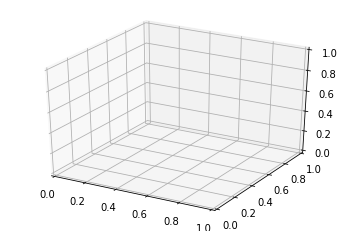

In [12]:
pca = PCA(3)
plot_columns = pca.fit_transform(views.iloc[:, 2:])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], z=plot_columns[:, 2], c=labels)

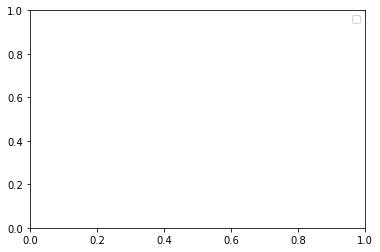

In [13]:
ax.scatter(plot_columns[:, 0], plot_columns[:, 1], plot_columns[:, 2], c=labels)
plt.legend(labels)
plt.show()

In [14]:
users['cluster'] = labels+1
users.to_csv('users_clusters_v2.txt', sep='\t')

# mysql shenanigans# 

In [36]:
ranks = pd.read_table('ranks.txt', index_col=0)

# # extract training and test sets

In [16]:
test = []
train = pd.DataFrame()

In [17]:
for user in users.index:
    test.append(activity.loc[activity['user'] == user]['hotel'].iloc[-1])
    train = train.append(activity.loc[activity['user'] == user].iloc[:-1])

In [18]:
test_set = pd.DataFrame(test, index=np.arange(1, len(test)+1))

# # go back and re-cluster for your validation. too lazy right now.

In [19]:
predictions = pd.DataFrame(index=np.arange(1, len(users)+1), columns=['hotel'])

In [29]:
for user in users.index:
    print  ('user',user)
    cluster = 'c' + str(users.loc[users.index == user]['cluster'].iloc[0])
    print ('cluster', cluster)

user 1
cluster c8
user 2
cluster c4
user 3
cluster c6
user 4
cluster c1
user 5
cluster c3
user 6
cluster c9
user 7
cluster c4
user 8
cluster c6
user 9
cluster c1
user 10
cluster c4
user 11
cluster c1
user 12
cluster c4
user 13
cluster c9
user 14
cluster c6
user 15
cluster c9
user 16
cluster c8
user 17
cluster c7
user 18
cluster c4
user 19
cluster c3
user 20
cluster c2
user 21
cluster c3
user 22
cluster c1
user 23
cluster c2
user 24
cluster c8
user 25
cluster c1
user 26
cluster c3
user 27
cluster c8
user 28
cluster c3
user 29
cluster c6
user 30
cluster c1
user 31
cluster c6
user 32
cluster c8
user 33
cluster c4
user 34
cluster c6
user 35
cluster c1
user 36
cluster c4
user 37
cluster c1
user 38
cluster c6
user 39
cluster c8
user 40
cluster c1
user 41
cluster c9
user 42
cluster c10
user 43
cluster c1
user 44
cluster c1
user 45
cluster c6
user 46
cluster c1
user 47
cluster c6
user 48
cluster c5
user 49
cluster c5
user 50
cluster c1
user 51
cluster c6
user 52
cluster c1
user 53
cluster c3
u

cluster c1
user 421
cluster c1
user 422
cluster c6
user 423
cluster c3
user 424
cluster c1
user 425
cluster c1
user 426
cluster c6
user 427
cluster c8
user 428
cluster c1
user 429
cluster c9
user 430
cluster c3
user 431
cluster c3
user 432
cluster c9
user 433
cluster c9
user 434
cluster c5
user 435
cluster c6
user 436
cluster c1
user 437
cluster c4
user 438
cluster c3
user 439
cluster c9
user 440
cluster c6
user 441
cluster c1
user 442
cluster c5
user 443
cluster c3
user 444
cluster c3
user 445
cluster c3
user 446
cluster c3
user 447
cluster c3
user 448
cluster c9
user 449
cluster c6
user 450
cluster c4
user 451
cluster c3
user 452
cluster c2
user 453
cluster c8
user 454
cluster c3
user 455
cluster c8
user 456
cluster c4
user 457
cluster c1
user 458
cluster c7
user 459
cluster c3
user 460
cluster c1
user 461
cluster c3
user 462
cluster c3
user 463
cluster c9
user 464
cluster c4
user 465
cluster c6
user 466
cluster c1
user 467
cluster c1
user 468
cluster c1
user 469
cluster c2
user 470


cluster c6
user 864
cluster c9
user 865
cluster c4
user 866
cluster c4
user 867
cluster c2
user 868
cluster c1
user 869
cluster c1
user 870
cluster c6
user 871
cluster c6
user 872
cluster c1
user 873
cluster c8
user 874
cluster c1
user 875
cluster c9
user 876
cluster c9
user 877
cluster c1
user 878
cluster c9
user 879
cluster c3
user 880
cluster c1
user 881
cluster c7
user 882
cluster c8
user 883
cluster c9
user 884
cluster c1
user 885
cluster c1
user 886
cluster c2
user 887
cluster c4
user 888
cluster c8
user 889
cluster c10
user 890
cluster c4
user 891
cluster c4
user 892
cluster c9
user 893
cluster c8
user 894
cluster c1
user 895
cluster c3
user 896
cluster c6
user 897
cluster c1
user 898
cluster c9
user 899
cluster c8
user 900
cluster c8
user 901
cluster c9
user 902
cluster c1
user 903
cluster c9
user 904
cluster c1
user 905
cluster c4
user 906
cluster c1
user 907
cluster c7
user 908
cluster c1
user 909
cluster c3
user 910
cluster c1
user 911
cluster c3
user 912
cluster c4
user 913

user 1274
cluster c9
user 1275
cluster c3
user 1276
cluster c6
user 1277
cluster c1
user 1278
cluster c2
user 1279
cluster c3
user 1280
cluster c2
user 1281
cluster c5
user 1282
cluster c6
user 1283
cluster c3
user 1284
cluster c8
user 1285
cluster c8
user 1286
cluster c8
user 1287
cluster c1
user 1288
cluster c1
user 1289
cluster c8
user 1290
cluster c1
user 1291
cluster c1
user 1292
cluster c8
user 1293
cluster c3
user 1294
cluster c8
user 1295
cluster c1
user 1296
cluster c2
user 1297
cluster c9
user 1298
cluster c6
user 1299
cluster c6
user 1300
cluster c8
user 1301
cluster c3
user 1302
cluster c1
user 1303
cluster c5
user 1304
cluster c1
user 1305
cluster c4
user 1306
cluster c8
user 1307
cluster c1
user 1308
cluster c2
user 1309
cluster c6
user 1310
cluster c1
user 1311
cluster c2
user 1312
cluster c1
user 1313
cluster c1
user 1314
cluster c1
user 1315
cluster c9
user 1316
cluster c9
user 1317
cluster c1
user 1318
cluster c3
user 1319
cluster c7
user 1320
cluster c4
user 1321
clu

user 1729
cluster c7
user 1730
cluster c2
user 1731
cluster c3
user 1732
cluster c7
user 1733
cluster c4
user 1734
cluster c9
user 1735
cluster c1
user 1736
cluster c9
user 1737
cluster c1
user 1738
cluster c7
user 1739
cluster c2
user 1740
cluster c1
user 1741
cluster c4
user 1742
cluster c6
user 1743
cluster c5
user 1744
cluster c1
user 1745
cluster c3
user 1746
cluster c1
user 1747
cluster c6
user 1748
cluster c8
user 1749
cluster c7
user 1750
cluster c9
user 1751
cluster c5
user 1752
cluster c1
user 1753
cluster c10
user 1754
cluster c1
user 1755
cluster c9
user 1756
cluster c9
user 1757
cluster c1
user 1758
cluster c6
user 1759
cluster c2
user 1760
cluster c1
user 1761
cluster c1
user 1762
cluster c9
user 1763
cluster c9
user 1764
cluster c5
user 1765
cluster c9
user 1766
cluster c1
user 1767
cluster c6
user 1768
cluster c9
user 1769
cluster c6
user 1770
cluster c9
user 1771
cluster c6
user 1772
cluster c9
user 1773
cluster c9
user 1774
cluster c1
user 1775
cluster c6
user 1776
cl

user 2148
cluster c7
user 2149
cluster c7
user 2150
cluster c4
user 2151
cluster c1
user 2152
cluster c1
user 2153
cluster c4
user 2154
cluster c5
user 2155
cluster c2
user 2156
cluster c8
user 2157
cluster c2
user 2158
cluster c5
user 2159
cluster c10
user 2160
cluster c8
user 2161
cluster c4
user 2162
cluster c5
user 2163
cluster c6
user 2164
cluster c7
user 2165
cluster c4
user 2166
cluster c6
user 2167
cluster c6
user 2168
cluster c6
user 2169
cluster c2
user 2170
cluster c5
user 2171
cluster c8
user 2172
cluster c1
user 2173
cluster c3
user 2174
cluster c1
user 2175
cluster c10
user 2176
cluster c1
user 2177
cluster c1
user 2178
cluster c9
user 2179
cluster c4
user 2180
cluster c7
user 2181
cluster c1
user 2182
cluster c4
user 2183
cluster c1
user 2184
cluster c6
user 2185
cluster c6
user 2186
cluster c1
user 2187
cluster c3
user 2188
cluster c6
user 2189
cluster c8
user 2190
cluster c1
user 2191
cluster c4
user 2192
cluster c2
user 2193
cluster c1
user 2194
cluster c8
user 2195
c

cluster c8
user 2668
cluster c1
user 2669
cluster c4
user 2670
cluster c1
user 2671
cluster c7
user 2672
cluster c1
user 2673
cluster c6
user 2674
cluster c1
user 2675
cluster c3
user 2676
cluster c8
user 2677
cluster c4
user 2678
cluster c3
user 2679
cluster c2
user 2680
cluster c4
user 2681
cluster c1
user 2682
cluster c8
user 2683
cluster c1
user 2684
cluster c6
user 2685
cluster c3
user 2686
cluster c7
user 2687
cluster c3
user 2688
cluster c7
user 2689
cluster c6
user 2690
cluster c6
user 2691
cluster c1
user 2692
cluster c3
user 2693
cluster c6
user 2694
cluster c1
user 2695
cluster c8
user 2696
cluster c4
user 2697
cluster c6
user 2698
cluster c1
user 2699
cluster c1
user 2700
cluster c9
user 2701
cluster c1
user 2702
cluster c3
user 2703
cluster c5
user 2704
cluster c1
user 2705
cluster c9
user 2706
cluster c8
user 2707
cluster c1
user 2708
cluster c3
user 2709
cluster c7
user 2710
cluster c3
user 2711
cluster c4
user 2712
cluster c4
user 2713
cluster c6
user 2714
cluster c3
us

cluster c7
user 3126
cluster c3
user 3127
cluster c9
user 3128
cluster c7
user 3129
cluster c6
user 3130
cluster c2
user 3131
cluster c8
user 3132
cluster c6
user 3133
cluster c1
user 3134
cluster c8
user 3135
cluster c5
user 3136
cluster c8
user 3137
cluster c7
user 3138
cluster c6
user 3139
cluster c2
user 3140
cluster c9
user 3141
cluster c8
user 3142
cluster c9
user 3143
cluster c1
user 3144
cluster c9
user 3145
cluster c1
user 3146
cluster c4
user 3147
cluster c9
user 3148
cluster c10
user 3149
cluster c4
user 3150
cluster c8
user 3151
cluster c9
user 3152
cluster c3
user 3153
cluster c1
user 3154
cluster c9
user 3155
cluster c8
user 3156
cluster c8
user 3157
cluster c9
user 3158
cluster c6
user 3159
cluster c7
user 3160
cluster c3
user 3161
cluster c2
user 3162
cluster c9
user 3163
cluster c3
user 3164
cluster c1
user 3165
cluster c8
user 3166
cluster c8
user 3167
cluster c8
user 3168
cluster c2
user 3169
cluster c7
user 3170
cluster c8
user 3171
cluster c3
user 3172
cluster c2
u

cluster c8
user 3588
cluster c7
user 3589
cluster c8
user 3590
cluster c4
user 3591
cluster c1
user 3592
cluster c2
user 3593
cluster c9
user 3594
cluster c3
user 3595
cluster c3
user 3596
cluster c9
user 3597
cluster c9
user 3598
cluster c5
user 3599
cluster c1
user 3600
cluster c8
user 3601
cluster c1
user 3602
cluster c1
user 3603
cluster c9
user 3604
cluster c9
user 3605
cluster c6
user 3606
cluster c1
user 3607
cluster c8
user 3608
cluster c8
user 3609
cluster c2
user 3610
cluster c5
user 3611
cluster c4
user 3612
cluster c4
user 3613
cluster c8
user 3614
cluster c2
user 3615
cluster c8
user 3616
cluster c2
user 3617
cluster c2
user 3618
cluster c8
user 3619
cluster c6
user 3620
cluster c9
user 3621
cluster c9
user 3622
cluster c6
user 3623
cluster c1
user 3624
cluster c8
user 3625
cluster c3
user 3626
cluster c8
user 3627
cluster c9
user 3628
cluster c4
user 3629
cluster c2
user 3630
cluster c9
user 3631
cluster c8
user 3632
cluster c6
user 3633
cluster c2
user 3634
cluster c9
us

user 4021
cluster c9
user 4022
cluster c1
user 4023
cluster c1
user 4024
cluster c2
user 4025
cluster c8
user 4026
cluster c2
user 4027
cluster c3
user 4028
cluster c6
user 4029
cluster c9
user 4030
cluster c10
user 4031
cluster c1
user 4032
cluster c8
user 4033
cluster c8
user 4034
cluster c1
user 4035
cluster c1
user 4036
cluster c8
user 4037
cluster c4
user 4038
cluster c4
user 4039
cluster c4
user 4040
cluster c7
user 4041
cluster c9
user 4042
cluster c1
user 4043
cluster c2
user 4044
cluster c3
user 4045
cluster c8
user 4046
cluster c7
user 4047
cluster c5
user 4048
cluster c7
user 4049
cluster c1
user 4050
cluster c4
user 4051
cluster c1
user 4052
cluster c3
user 4053
cluster c5
user 4054
cluster c3
user 4055
cluster c9
user 4056
cluster c3
user 4057
cluster c1
user 4058
cluster c1
user 4059
cluster c1
user 4060
cluster c7
user 4061
cluster c9
user 4062
cluster c9
user 4063
cluster c8
user 4064
cluster c4
user 4065
cluster c6
user 4066
cluster c1
user 4067
cluster c3
user 4068
cl

cluster c9
user 4414
cluster c1
user 4415
cluster c6
user 4416
cluster c4
user 4417
cluster c8
user 4418
cluster c3
user 4419
cluster c5
user 4420
cluster c1
user 4421
cluster c1
user 4422
cluster c6
user 4423
cluster c3
user 4424
cluster c4
user 4425
cluster c5
user 4426
cluster c3
user 4427
cluster c6
user 4428
cluster c8
user 4429
cluster c9
user 4430
cluster c9
user 4431
cluster c1
user 4432
cluster c7
user 4433
cluster c3
user 4434
cluster c7
user 4435
cluster c1
user 4436
cluster c9
user 4437
cluster c2
user 4438
cluster c3
user 4439
cluster c8
user 4440
cluster c1
user 4441
cluster c1
user 4442
cluster c4
user 4443
cluster c3
user 4444
cluster c6
user 4445
cluster c3
user 4446
cluster c1
user 4447
cluster c1
user 4448
cluster c1
user 4449
cluster c1
user 4450
cluster c6
user 4451
cluster c6
user 4452
cluster c1
user 4453
cluster c5
user 4454
cluster c7
user 4455
cluster c7
user 4456
cluster c8
user 4457
cluster c6
user 4458
cluster c9
user 4459
cluster c6
user 4460
cluster c1
us

# # user_hotels = activity.loc[activity['user'] == user]['hotel']

In [37]:
    user_hotels = train.loc[activity['user'] == user]['hotel']
    ranked_hotels = ranks[cluster]
    for hotel in ranked_hotels:
        if hotel not in user_hotels:
            predictions['hotel'][user] = hotel
            break